In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
mpl.rcParams['font.sans-serif']=['SimHei']

In [181]:
data_lg = pd.read_csv(r'C:\Users\lou\Desktop\枫枫的小仙女\readata-master\拉勾爬虫与分析\lagou.csv',index_col=0).iloc[:,4:]
data_lg.head()

,businessZones,city,companyFullName,companyId,companyLabelList,companyLogo,companyShortName,companySize,createTime,deliver,...,resumeProcessRate,salary,score,secondType,skillLables,stationname,subwayline,thirdType,workYear,job_detail
0,['亦庄'],北京,达疆网络科技（上海）有限公司,32836,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",i/image2/M01/AF/7F/CgotOV3kqOqAZvWrAAAaonXDCck...,达达-京东到家,2000人以上,2019-12-02 20:38:25,0,...,100,15k-30k,0,数据分析,"['BI', '数据分析']",万源街,亦庄线,BI,3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据..."
1,NaN,北京,北京音娱时光科技有限公司,286568,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",i/image2/M01/8B/9A/CgotOV15uyKAMCL3AAAvAzXIrFw...,音娱时光,50-150人,2019-12-03 11:23:35,0,...,100,10k-18k,0,数据分析,"['SQL', 'BI', 'SPSS']",知春路,10号线,数据分析,1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...
2,['西北旺'],北京,北京千喜鹤餐饮管理有限公司,278964,[],i/image2/M00/15/70/CgotOVn0PGWACXyxAAA4aF7GFgk...,千喜鹤,2000人以上,2019-12-03 10:35:09,0,...,0,20k-30k,0,数据分析,"['SQL', '数据分析']",永丰,16号线,数据分析,3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...
3,NaN,北京,吉林省海生电子商务有限公司,399744,[],images/logo_default.png,吉林省海生电子商务有限公司,少于15人,2019-12-03 10:35:56,0,...,0,33k-50k,0,数据分析,['数据分析'],NaN,NaN,数据分析,3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...
4,"['大望路', '建外大街', '南磨房']",北京,韦博网讯科技（北京）有限公司,580170,[],i/image2/M01/41/6C/CgoB5lz3eJGAYy2MAACd7SzHgKw...,WPIC,50-150人,2019-12-03 12:10:22,0,...,0,10k-15k,0,数据分析,['数据分析'],国贸,1号线,产品|需求|项目类,1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...


In [182]:
data_lg.info()
data_lg.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 0 to 3139
Data columns (total 47 columns):
businessZones            1544 non-null object
city                     3140 non-null object
companyFullName          3140 non-null object
companyId                3140 non-null int64
companyLabelList         3140 non-null object
companyLogo              3139 non-null object
companyShortName         3140 non-null object
companySize              3140 non-null object
createTime               3140 non-null object
deliver                  3140 non-null int64
district                 3133 non-null object
education                3140 non-null object
explain                  0 non-null float64
financeStage             3140 non-null object
firstType                3140 non-null object
formatCreateTime         3140 non-null object
gradeDescription         0 non-null float64
hitags                   260 non-null object
imState                  3140 non-null object
industryField            3

(3140, 47)

In [183]:
data_lg.dropna(axis=1,how='all',inplace=True)#删除全为空的列
#选取有意义的列
data_lg = data_lg[['businessZones', 'city', 'companyLabelList', 'companyShortName', 'companySize', 'education','financeStage', 'hitags',
                   'industryField','positionAdvantage', 'latitude','longitude','positionName', 'salary','workYear','job_detail']]


data_lg.columns = ['商圈','城市','公司保障','公司名称','公司规模','学历','融资','福利','行业','优点','纬度','经度','岗位名称','薪水','工作经验','具体要求']
#data_lg.info()


In [184]:
#去掉不是数据分析的岗位
con1 = data_lg['岗位名称'].str.contains('数据分析')
con2 = ~data_lg['岗位名称'].str.contains('实习')

data_lg = data_lg[con1&con2]
#将一列分割成两列
data_lg['最低薪水'],data_lg['最高薪水'] = data_lg['薪水'].str.split('-',1).str

#转换成数字
data_lg['最低薪水'] = data_lg['最低薪水'].str.strip('kK').apply(lambda x:int(x))*1000
data_lg['最高薪水'] = data_lg['最高薪水'].str.strip('kK').apply(lambda x:int(x))*1000

data_lg['平均薪水'] = (data_lg['最低薪水']+ data_lg['最高薪水'])/2

In [185]:
#处理行业信息 分词

def clean_industry(x):
    #x = x.split(',')
    x = re.split('[、,|丨 ]',x)
    if len(x) > 1 and x[0] == '移动互联网':
        return x[1]
    else:
        return x[0]

data_lg['行业'] = data_lg['行业'].apply(clean_industry)

## 分析思路
### 维度：城市，公司规模，行业，工作经验，具体要求,学历
### 指标：薪水，岗位数量，技能要求，工作经验

探索各个维度和指标之间的关系

### 1.城市和岗位数量以及薪资的分布

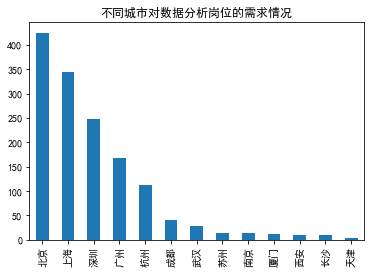

In [186]:
#城市-岗位数量
data_lg['城市'].value_counts().plot(kind='bar',title='不同城市对数据分析岗位的需求情况')

Text(0.5, 1.0, '不同城市平均薪资浮动范围')

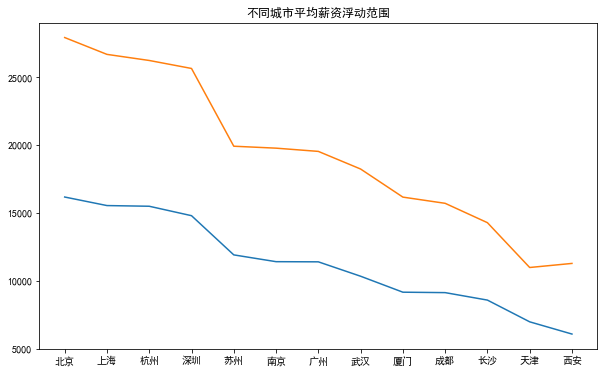

In [187]:
plt.figure(figsize=(10,6))
salary_com = data_lg.groupby(['城市'])['最低薪水','最高薪水'].mean().sort_values(by='最低薪水',ascending=False)

plt.plot(salary_com.index,salary_com.values)
plt.title('不同城市平均薪资浮动范围')

### 2.公司规模和岗位数量以及薪资的分布

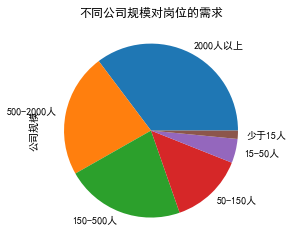

In [188]:
#不同公司规模分布
data_lg['公司规模'].value_counts().plot(kind='pie',title='不同公司规模对岗位的需求')

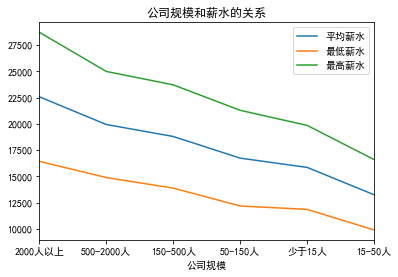

In [189]:
data_lg.groupby(['公司规模'])['平均薪水','最低薪水','最高薪水'].mean().sort_values(by='平均薪水',ascending=False).plot(title='公司规模和薪水的关系')


Text(0.5, 1.0, '不同规模公司的薪资水平对比')

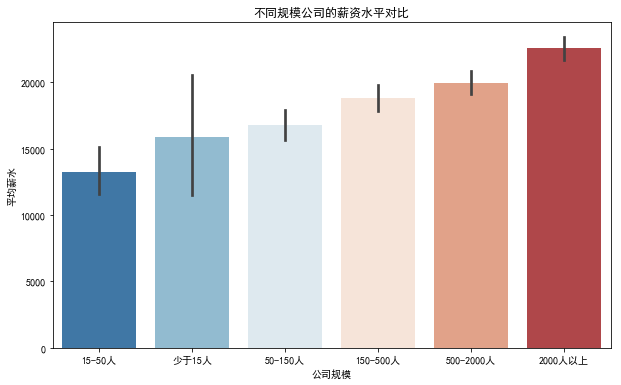

In [190]:
data_scale_salary = data_lg.groupby(['公司规模'])['平均薪水'].mean().sort_values().index.tolist()

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x="公司规模", y="平均薪水", order=data_scale_salary,data=data_lg, ci=95,palette="RdBu_r")
plt.title('不同规模公司的薪资水平对比')

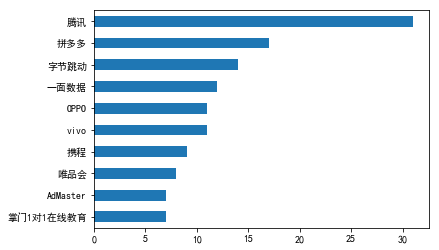

In [191]:
data_lg['公司名称'].value_counts()[:10].sort_values().plot(kind='barh')

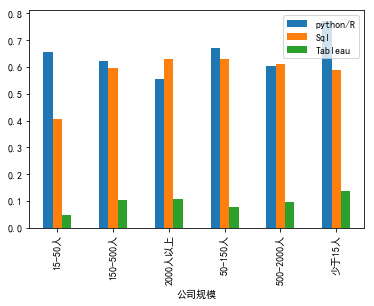

In [192]:
#不同规模公司对技能的要求
data_lg['具体要求']  = data_lg['具体要求'].str.lower().fillna('')
data_lg['python/R'] = data_lg['具体要求'].apply(lambda x:1 if ('python' in x) or ('r' in x) else 0)
#data_lg['R'] = data_lg['具体要求'].apply(lambda x:1 if ('r' in x) else 0)
data_lg['Sql'] = data_lg['具体要求'].map(lambda x:1 if ('sql' in x) or ('hive' in x) else 0)
data_lg['Tableau'] = data_lg['具体要求'].map(lambda x:1 if ('tableau' in x) else 0)
data_lg['Excel'] = data_lg['具体要求'].map(lambda x:1 if ('excel' in x) else 0)
data_lg['相关经验'] = data_lg['具体要求'].map(lambda x:1 if ('相关经验' in x) else 0)

data_lg.groupby('公司规模')['python/R','Sql','Tableau'].mean().plot(kind='bar')

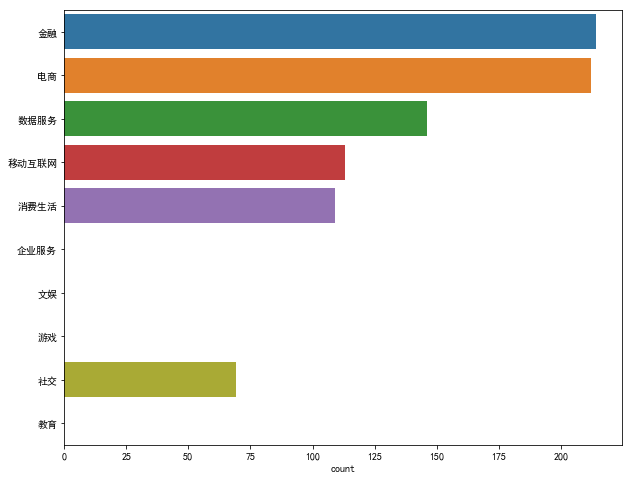

In [193]:
#各行业岗位数量分布
industry_index = data_lg['行业'].value_counts()[:10].index
industry = data_lg['行业'][data_lg['行业'].isin(industry)]

fig,ax = plt.subplots(figsize=(10,8))
sns.countplot(y=industry.values,order = industry_index)
#plt.box(False)

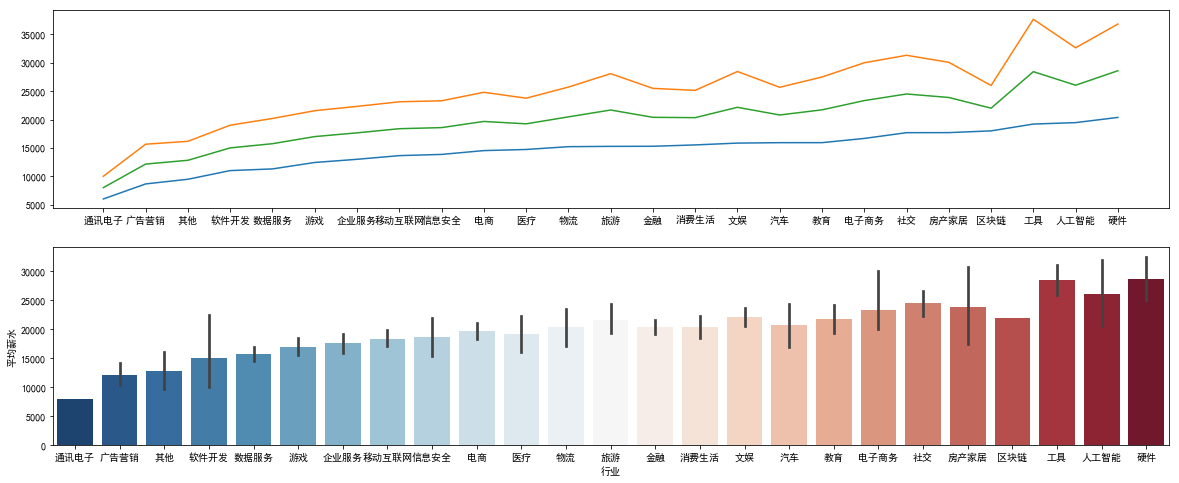

In [194]:
#行业-岗位数量-薪资
plt.figure(figsize=(20,8))
data_indu_salary = data_lg.groupby('行业')['最低薪水','最高薪水','平均薪水'].mean().sort_values(by='最低薪水')
data_indu_salary_tolist =  data_lg.groupby('行业')['最低薪水','最高薪水','平均薪水'].mean().sort_values(by='最低薪水').index.tolist()
plt.subplot(2,1,1)
plt.plot(data_indu_salary.index,data_indu_salary.values)
plt.subplot(2,1,2)
sns.barplot(x='行业',y='平均薪水',data=data_lg, ci=95,palette="RdBu_r",order=data_indu_salary_tolist)

(Text(0.5, 51.34375, ''), Text(69.640625, 0.5, ''))

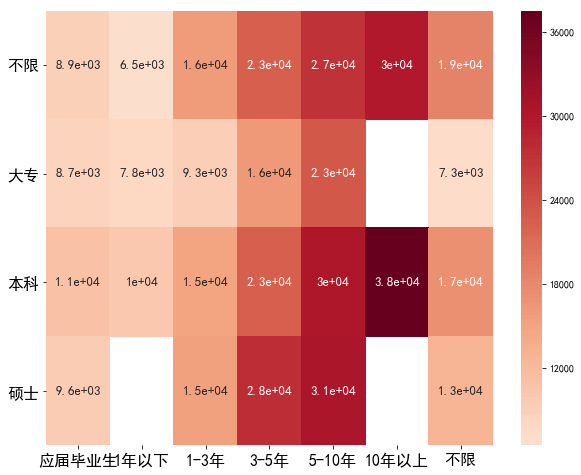

In [210]:
#工作经验分布
corr = data_lg.pivot_table(index='学历',columns='工作经验',values='平均薪水').sort_index()
corr = corr[["应届毕业生","1年以下","1-3年","3-5年","5-10年","10年以上","不限"]]

#工作经验、学历和薪资的关系
plt.figure(figsize=(10,8))

sns.heatmap(corr,cmap="RdBu_r",center=20,annot=True,annot_kws={'fontsize':13})
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16,labelrotation=0)
plt.xlabel(""),plt.ylabel("")

(Text(0.5, 51.34375, ''), Text(69.078125, 0.5, ''))

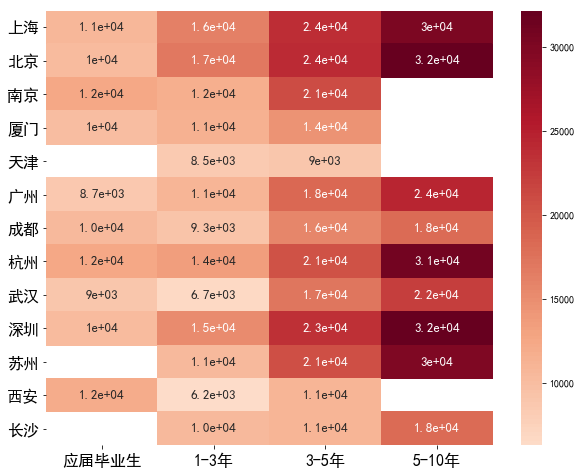

In [212]:
#城市，工作经验薪水关系
corr = data_lg.pivot_table(index='城市',columns='工作经验',values='平均薪水').sort_index()
corr = corr[["应届毕业生","1-3年","3-5年","5-10年"]]

#工作经验、学历和薪资的关系
plt.figure(figsize=(10,8))

sns.heatmap(corr,cmap="RdBu_r",center=20,annot=True,annot_kws={'fontsize':13})
plt.tick_params(axis='x', which='major', labelsize=16)
plt.tick_params(axis='y', which='major', labelsize=16,labelrotation=0)
plt.xlabel(""),plt.ylabel("")

In [258]:
#福利词云图
import folium
import webbrowser
from folium.plugins import HeatMap

data_folium = data_lg[['经度','纬度','平均薪水']].dropna()
num = data_folium.shape[0]
# 获取纬度
lat=np.array(data_folium["纬度"])
# 获取经度
lon=np.array(data_folium["经度"][0:num])
# 获取PM2.5，转化为numpy浮点型
sal=np.array(data_folium["平均薪水"][0:num],dtype=float)
# 将数据制作成[lats, lons, weights]的形式
data_folium=[[lat[i],lon[i],sal[i]] for i in range(num)]
# # 绘制Map，中心经纬度[32, 120],开始缩放程度是5倍
map_osm = folium.Map(location=[32,120],zoom_start=5)
##将热力图添加到前面建立的map里
HeatMap(data_folium).add_to(map_osm)

map_osm.save(r'C:\Users\lou\python数据分析\爬虫\map.html')
#webbrowser.open(r'C:\Users\lou\python数据分析\爬虫\map.html')

True

In [261]:
map_osm

In [214]:
data_lg

,商圈,城市,公司保障,公司名称,公司规模,学历,融资,福利,行业,优点,...,工作经验,具体要求,最低薪水,最高薪水,平均薪水,python/R,Sql,Tableau,Excel,相关经验
0,['亦庄'],北京,"['年底双薪', '绩效奖金', '岗位晋升', '定期体检']",达达-京东到家,2000人以上,本科,D轮及以上,"['免费班车', '新婚红包', '定期调薪', '电脑补贴', '生子红包', '地铁周边...",消费生活,成长快、氛围好、领导好,...,3-5年,"1 、负责o2o电商日常运营数据的统计, 监控, 梳理指标体系；||2、基于海量用户行为数据...",15000,30000,22500.0,1,1,0,1,0
1,NaN,北京,"['年底双薪', '绩效奖金', '带薪年假', '免费健身']",音娱时光,50-150人,本科,A轮,NaN,移动互联网,技术大牛多；免费餐饮；氛围好；,...,1-3年,职责描述：||1. 完善业务数据监控体系，进行新功能指标埋点逻辑设计，搭建分析框架，...,10000,18000,14000.0,1,1,0,1,1
2,['西北旺'],北京,[],千喜鹤,2000人以上,本科,未融资,NaN,消费生活,福利好，五险一金，住房补助,...,3-5年,工作职责：||1.负责根据业务目标，制定并执行产品或业务的运营数据监控与分析机制。||2.完...,20000,30000,25000.0,1,1,0,0,1
3,NaN,北京,[],吉林省海生电子商务有限公司,少于15人,本科,不需要融资,NaN,电商,五险一金,...,3-5年,1.基于对业务的支持和理解，搭建出可以准确反映业务运作状况的数据指标体系；||2.商业嗅觉灵...,33000,50000,41500.0,1,1,0,0,0
4,"['大望路', '建外大街', '南磨房']",北京,[],WPIC,50-150人,本科,未融资,NaN,电商,待遇优厚 ，良好的发展前景,...,1-3年,职责描述：||1. 调研工作以客户需求为主导；||2. 根据市场调研计划，进行市场信息的收集...,10000,15000,12500.0,1,0,0,0,0
5,"['学院路', '知春路']",北京,"['节日礼物', '技能培训', '绩效奖金', '年度旅游']",久爱致和,150-500人,本科,上市公司,"['公司氛围好', '免费体检', '地铁周边', '定期团建', '生日聚会', '6险1金']",电商,互联网公司 十三薪 六险一金,...,1年以下,岗位职责：||1、负责统计电商平台内各项目的日常运营数据及活动数据；||2、跟踪与了解电商平...,6000,8000,7000.0,1,1,0,1,0
6,['酒仙桥'],北京,[],斑马天下,50-150人,本科,天使轮,NaN,教育,六险一金，试用期100%薪资，大牛带队,...,1-3年,岗位职责：||1. 建立教学、用户增长业务指标体系，监控和分析业务运营情况，建设业务报表体系...,10000,20000,15000.0,0,1,1,1,0
7,NaN,北京,"['带薪年假', '管理规范', '五险一金', '岗位晋升']",瑞银信,2000人以上,本科,不需要融资,NaN,金融,"五险一金,定期体检,每月补贴",...,不限,岗位职责：||1. 研究现有业务和客群，针对业务需求建立数据分析模型，为业务团队提供数据分析...,10000,20000,15000.0,1,0,0,1,0
8,NaN,北京,"['五险一金', '岗位晋升', '技能培训', '定期体检']",木瓜移动,150-500人,本科,B轮,NaN,移动互联网,国际化团队，快速成长，扁平化管理,...,3-5年,职位职责： ||1、负责部门层面的业务分析工作，收集、整理和可视化每天的业务数据，撰写优化运...,15000,25000,20000.0,0,0,0,0,0
9,NaN,北京,"['五险一金', '带薪年假', '免费班车', '定期体检']",京东集团,2000人以上,大专,上市公司,"['免费班车', '免费体检', '地铁周边']",电商,京东,...,5-10年,1.负责从数据底层提取各维度数据，通过数据挖掘和分析，为业务决策和开展进行保驾护航； ||2...,15000,25000,20000.0,1,1,0,0,0


In [ ]:
import numpy as np
x = [1,2,3,4,5,6,7,8]
x1 = [2,3,4,5,5,7,7,8,8,9,10]
#plt.figure(figsize=(10,8))

plt.plot(np.arange(1,9),x)
plt.plot(np.arange(1,12),x1)